<a href="https://colab.research.google.com/github/hhaemin/my-repository/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
x = 5*np.random.randn(500)
y = 2*np.random.randn(500)
feature = np.zeros(shape=(500,2)) # 500x2의 영행렬
feature[:,0] = x
feature[:,1] = y

num_data = np.size(feature, 0)
num_feature = np.size(feature, 1)

print(f'number of data : {num_data}')
print(f'number of feature : {num_feature}')

number of data : 500
number of feature : 2




 plot the input data



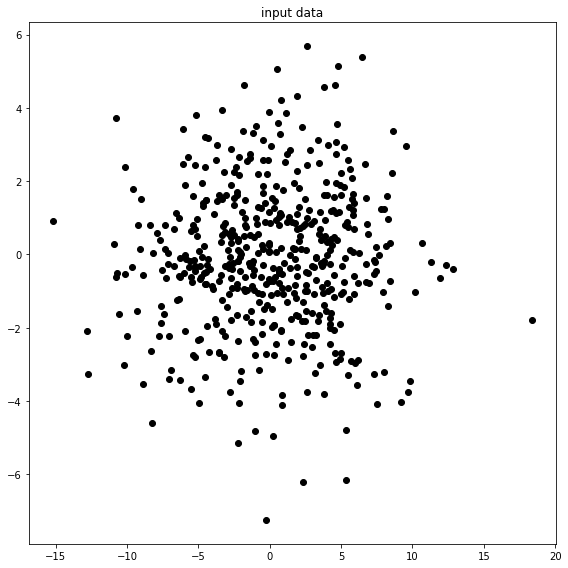

In [28]:
plt.figure(figsize=(8,8))
plt.title('input data')

plt.scatter(x, y, color='black')

plt.tight_layout()
plt.show()

In [35]:
cluster_k = 4
iteration = 10
loss = np.zeros(iteration)
center_iteration = np.zeros((iteration, cluster_k, num_feature))
label_pred = np.random.randint(0,cluster_k, size=(num_data))
distance = np.zeros((num_data, cluster_k))

In [6]:
center = np.zeros(shape=(cluster_k, num_feature))
# for num in range(cluster_k):
#   rand=np.random.randint(0,feature.shape[0]-1)
#   center[num] = feature[rand]
#   print(feature[rand])

In [7]:
print(center)

[[0. 0.]
 [0. 0.]]


compute center

In [8]:
center = np.zeros(shape=(cluster_k,num_feature))
cluster_1 = feature[np.where(label_pred == 0)] # 0인 값들의 인덱스 할당
center[0] = np.sum(cluster_1, axis=0) / len(cluster_1) # cluster_1의 평균값
cluster_2 = feature[np.where(label_pred ==1)] # 1인 값들의 인덱스 할당
center[1] = np.sum(cluster_2, axis=0) / len(cluster_2) # cluster_2의 평균값
center

array([[ 0.28939583,  0.05973787],
       [ 0.42250399, -0.14702829]])

compute distance

In [9]:
# 유클리안 거리공식 사용
loss_1 = np.sum((feature-center[0])**2, 1)
loss_2 = np.sum((feature-center[1])**2, 1)
loss_1.shape, loss_2.shape

((500,), (500,))

In [12]:
distance = np.zeros(shape=(num_data, cluster_k))
distance[:,0] = loss_1
distance[:,1] = loss_2

label assign

In [13]:
label_pred = np.zeros(shape=(num_data))
label_pred = np.argmin(distance, axis=1)
label_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,

iteration

In [20]:
center = np.zeros(shape=(cluster_k, num_feature))
temp_center = np.zeros(shape=(cluster_k, num_feature))
distance = np.zeros(shape=(num_data, cluster_k))

for i in range(iteration):
  for j in range(cluster_k): # cluster_k = 2
    cluster = feature[np.where(label_pred==j)] # j=0, j=1
    center[j] = np.sum(cluster, axis=0) / len(cluster)
    distance[:,j] = np.sum((feature - center[j]) **2, axis=1)
  label_pred = np.argmin(distance, axis=1)

  loss[i] = np.sum(distance[range(num_data),label_pred]) / num_data
  center_iteration[i] = center

In [37]:
loss

array([22.85735241,  8.11531331,  7.05723185,  6.9028895 ,  6.87137287,
        6.82893713,  6.79412136,  6.77656842,  6.77325763,  6.77301558])

In [38]:
center_iteration

array([[[-3.16006910e-01,  1.18479811e-01],
        [ 2.37906170e-01, -1.67651909e-01],
        [-3.84734356e-01, -1.26483431e-01],
        [ 7.09009231e-01, -2.06722483e-01]],

       [[-2.03323671e+00,  1.97098476e+00],
        [ 1.44797966e-01, -1.64597534e+00],
        [-4.59880532e+00, -9.44614912e-01],
        [ 4.18171355e+00, -1.54841793e-01]],

       [[-1.70353952e+00,  1.87380261e+00],
        [ 1.74918118e-01, -1.29334995e+00],
        [-5.96088564e+00, -7.29619808e-01],
        [ 5.03491301e+00,  5.26530424e-04]],

       [[-1.55294008e+00,  1.68132999e+00],
        [ 3.38793329e-01, -1.17780837e+00],
        [-6.40290201e+00, -6.00383763e-01],
        [ 5.42550340e+00,  1.45474910e-03]],

       [[-1.57766604e+00,  1.56531118e+00],
        [ 4.55957512e-01, -1.17392221e+00],
        [-6.52234824e+00, -5.57547853e-01],
        [ 5.55791130e+00,  6.73954142e-03]],

       [[-1.64251197e+00,  1.43189351e+00],
        [ 6.91022083e-01, -1.17974875e+00],
        [-6.56170505e+

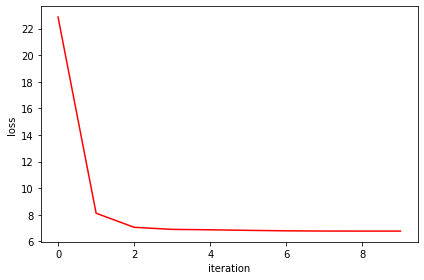

In [39]:
plt.plot(loss, '-', color='red')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.tight_layout()
plt.show()

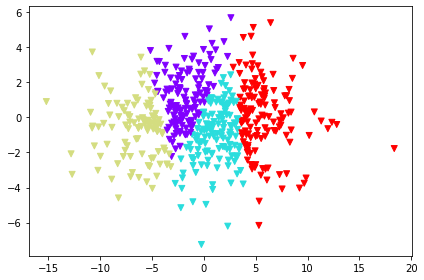

In [40]:
plt.scatter(feature[:,0], feature[:,1], marker = 'v', c = label_pred, cmap = 'rainbow')

plt.tight_layout()
plt.show()

In [25]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [36]:
# 조건문을 쓴 전체 코드
center = np.zeros(shape=(cluster_k, num_feature))
distance = np.zeros(shape=(num_data, cluster_k))
temp_center = np.zeros(shape=(cluster_k, num_feature))

for i in range(iteration):
  for j in range(cluster_k):
    cluster = feature[np.where(label_pred==j)]
    if len(feature[label_pred ==j]) > 0:
      center[j] = np.sum(cluster, axis=0) / len(cluster)
    else :
      center[j] = temp_center[j]

    distance[:,j] = np.sum((feature - center[j]) **2, axis =1)
  temp_center = center
  label_pred = np.argmin(distance, axis =1)

  loss[i] = np.sum(distance[range(num_data),label_pred]) /num_data
  center_iteration[i] = center

sickit library 를 사용한 k-means clustering

In [45]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)

In [46]:
kmeans.fit(feature)

KMeans(n_clusters=10)

In [47]:
label_sklearn = kmeans.predict(feature)

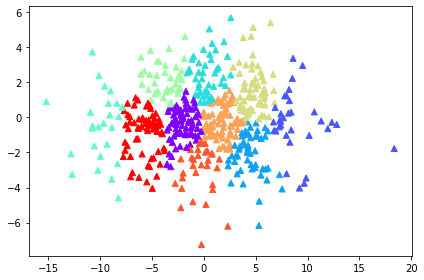

In [48]:
plt.scatter(feature[:,0], feature[:,1], marker = '^', c = label_sklearn, cmap = 'rainbow')

plt.tight_layout()
plt.show()